# MAE performance without/with partial information of circulating isolates
Plot MAE scores of our model without/with information of 10% of randomly selected circulating isolates over 14 test seasons from 2014NH to 2020SH.

Note that, as it uses results from Supp. Fig. 7, first run the associated notebook before running this notebook.

## Imports

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context(rc={"axes.labelsize":9,
                    "xtick.labelsize":8,
                    "ytick.labelsize":8,
                    "legend.fontsize":8,
                    "legend.title_fontsize":8})

## Filenames

In [2]:
path_result = "../results/Fig3b_MAE_withoutWith_circIsolatesTrain/"   # results will be saved in this directory
Path(path_result).mkdir(parents=True, exist_ok=True)   # make directory if it does not exist already

scores_fn = "../results/SuppFig7_circIsolatesTrain/SuppFig7_circIsolatesTrain.csv"
fig_fn    = path_result + "Fig3b_MAE_withoutWith_circIsolatesTrain.svg"

## Read scores and prepare data for plotting

In [3]:
scores = pd.read_csv(scores_fn)
scores = scores[["run", "circ_train", "season", "MAE"]]
scores = scores[scores.season != "Average"]
scores = scores[scores.circ_train.isin(["0", "10%"])]

scores_mean = scores.groupby(["season", "circ_train"], as_index=True).mean()
scores_mean.drop(columns=["run"], inplace=True)
scores_mean = scores_mean.unstack(level=0)
scores_mean.columns = scores_mean.columns.droplevel()

## Plot MAE per season

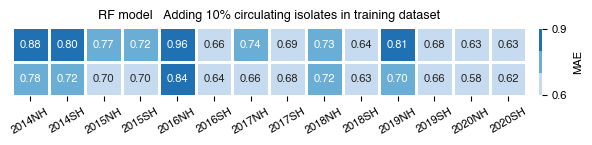

In [5]:
fig, ax = plt.subplots(figsize=(8,0.9))

tmp = sns.heatmap(scores_mean,
                  annot=True, annot_kws={"size":8}, fmt='.2f',
                   vmin=0.6,
                   vmax=0.9,
                  cmap=sns.color_palette("Blues", 3),
                  cbar_kws={"shrink":0.95,
                            "orientation":"vertical",
                            "label":"MAE",
                            "ticks":[0.6,0.9],
                            "pad":0.02},
                  linewidths=1,
                  # square=True,
                  ax=ax)

# configurations for figure
cbar = tmp.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.yaxis.label.set_size(8)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.get_yaxis().set_visible(False)
                  

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("RF model   Adding 10% circulating isolates in training dataset", fontsize=9)

# save figure
fig.savefig(fig_fn, format='svg', bbox_inches='tight')